# Homework 2 Programming Problem 7 (30 points)

## Problem Description

In this problem you will implement polynomial linear least squares regression on two datasets, with and without regularization. Additionally, you will use gradient descent to optimize for the model parameters.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Print fitted model parameters `w` for the 4 models requested without regularization
- Print fitted model parameters `w` for the 2 models requested *with* $L_2$ regularization
- Print fitted model parameters `w` for the one model solved via gradient descent

Plots:
- 2 plots of each dataset along with the ground truth function
- 4 plots of the fitted function along with the respective data and ground truth function for LLS without regularization
- 2 plots of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization
- 1 plot of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization solved via gradient descent

Discussion:
- Discussion of challenges fitting complex models to small datasets
- Discussion of difference between the $L_2$ regularized model versus the standard model
- Dicussion of whether gradient descent could get stuck in a local minimum
- Discussion of gradient descent results versus closed form results

#### Imports and Utility Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gt_function():
    xt = np.linspace(0,1,101)
    yt = np.sin(2 *np.pi*xt)
    return xt, yt

def plot_data(x,y,xt,yt,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

def plot_model(x,y,xt,yt,xr,yr,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.plot(xr,yr,'r-', label = 'Fitted Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

## Load and visualize the data

The data is contained in `d10.npy` and `d100.npy` and can be loaded with `np.load()`. 

Store the data as:
- `x10` and `x100` (the first column of the data)
- `y10` and `y100` (the second column of the data)

Generate the ground truth function $f(x)=\textrm{sin}(2\pi x)$ using `xt, yt = gt_function()`.

Then visualize the each dataset with `plotxy(x,y,xt,yt,title)` with an appropriate title. You should generate two plots.

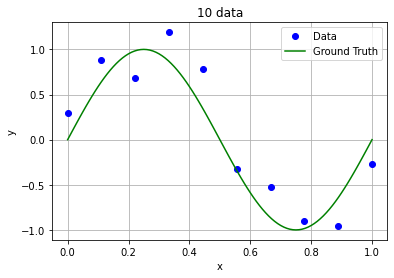

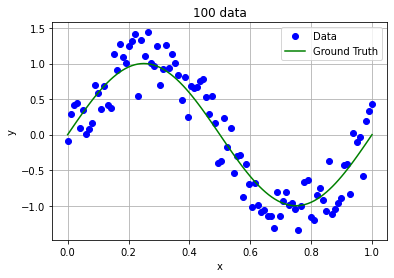

In [2]:
# YOUR CODE GOES HERE

# Data load
d10 = np.load("d10.npy")
d100 = np.load("d100.npy")
x10 = d10[:,0]
x100 = d100[:,0]
y10 = d10[:,1]
y100 = d100[:,1]

# GT
xt, yt =  gt_function()



plot_data(x10, y10, xt, yt, title="10 data")
plot_data(x100, y100, xt, yt, title="100 data")


## Implement polynomial linear regression

Now you will implement polynomial linear least squares regression without regularization using the closed form solution from lecture to compute the model parameters. You will consider the following 4 cases:

1. Data:  data10.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data: data100.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

weights: [-1.09384447 -0.66283292  0.80276877]
w shape:  (3, 1)


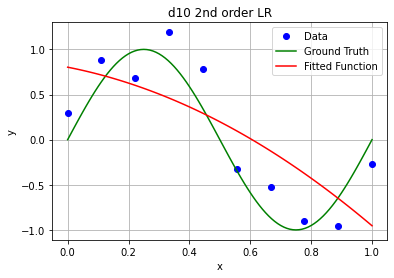

weights: [ 0.12128272 -2.04993418  0.99435046]
w shape:  (3, 1)


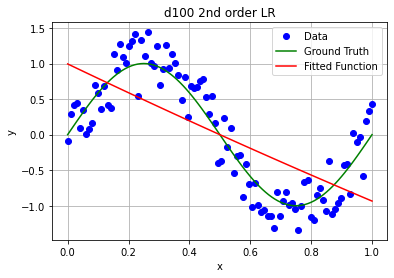

In [3]:
# YOUR CODE GOES HERE
# Fitting data
xr = np.linspace(0,1, 101)


# 2nd order model 
class second_order():
    def __init__(self):
        self.wieghts = 0
    def sq_matrix(self, x): 
        x = x.reshape(-1,1)
        x_sq = x**2
        X = np.concatenate([x_sq, x, np.ones_like(x)], axis = 1)
        return X
    
    def train_weight(self, x,y):
        X = self.sq_matrix(x)
        self.weights  = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1,1)
        print("weights:", self.weights.flatten())
        print("w shape: ", self.weights.shape)
        return self.weights
    def fit(self,x):
        X = self.sq_matrix(x)
        yreg = X @ self.weights
        return yreg

# d10 2nd order
model2 = second_order()
w10_2nd = model2.train_weight(x10, y10)
yreg10_2nd = model2.fit(xr)

plot_model(x10, y10, xt, yt, xr, yreg10_2nd, title = "d10 2nd order LR")


# d100 2nd order
w100_2nd = model2.train_weight(x100, y100)
yreg100_2nd = model2.fit(xr)
plot_model(x100, y100, xt, yt, xr, yreg100_2nd, title = "d100 2nd order LR")


In [4]:
# 9th order polynomial model
class ninth_order():
    def __init__(self):
        self.wieghts = 0
        self.Im = np.eye(9+1)
    # Generate parameter matrix
    def nin_matrix(self, x): 
        x = x.reshape(-1,1)
        param = [x**(10-i) for i in range(1,10)] 
        param.append(np.ones_like(x)) # 10 columns (9th order)
        X = np.concatenate(param, axis = 1)
        return X
    
    # train weights using inversion 
    def train_weight(self, x,y, regularization:bool = False, L = 1e-9):
        X = self.nin_matrix(x)
        if regularization: 
            self.Im[-1, -1] = 0 # Bias term = 0 

            # SOLVING W
            self.weights = w = np.linalg.inv(X.T @ X + L*self.Im)@X.T@y.reshape(-1,1)
            print("weights:", self.weights.flatten())
            print("w shape: ", self.weights.shape)
            return self.weights
        
        # SOLVING W
        self.weights  = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1,1)
        print("weights:", self.weights.flatten())
        print("w shape: ", self.weights.shape)
        return self.weights
    # Model fit
    def fit(self,x):
        X = self.nin_matrix(x)
        yreg = X @ self.weights
        return yreg
    
    # Train w/ Gradient Decent
    def gradient_train(
            self, x, y, w0:list=[], lr = 0.075,iterations = 50000, 
            regularization:bool= True, L = 1e-9):
        self.Im[-1, -1] = 0
        X = self.nin_matrix(x)
        # Initial Guesses
        if len(w0):
            self.weights = w0
        for _ in range(iterations):
            self.weights = self.weights - lr*self.gradient(
                X, y, self.weights, 
                regularization=regularization, L= L, Im = self.Im
                )
        print("weights:", self.weights.flatten())
        print("Train with Gradient Descent: lr %f, iterations %d, regularization= %s" 
              % (lr, iterations, str(regularization)))
        return self.weights
    
    # Compute gradient    
    def gradient(self, X,y,w, regularization= False, L = 1e-9, Im = 0):
        if regularization:
            return X.T @ X @ w - X.T @ y.reshape(-1,1) + L*Im @ w
        return X.T @ X @ w - X.T @ y.reshape(-1,1)


    

weights: [-3.91761283e+04  1.67594415e+05 -2.96229253e+05  2.79016312e+05
 -1.50471516e+05  4.63650000e+04 -7.66226362e+03  5.71359152e+02
 -8.49285482e+00  3.00000257e-01]
w shape:  (10, 1)


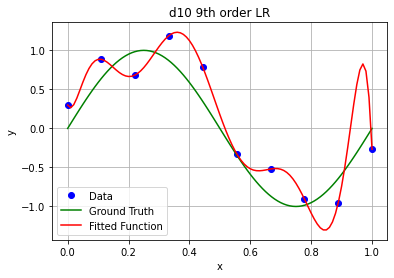

weights: [-2.21784258e+03  1.15804877e+04 -2.48710265e+04  2.86953283e+04
 -1.95229285e+04  8.13340230e+03 -2.07031119e+03  2.84965349e+02
 -1.18525000e+01  2.71587213e-01]
w shape:  (10, 1)


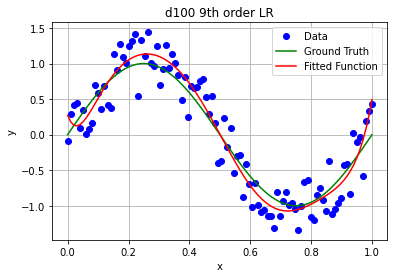

In [5]:

# d10 9th order
model9 = ninth_order()
w10_9th = model9.train_weight(x10, y10)
yreg10_9th = model9.fit(xr)

plot_model(x10, y10, xt, yt, xr, yreg10_9th, title = "d10 9th order LR")

# d100 9th order
w100_9th = model9.train_weight(x100, y100)
yreg100_9th = model9.fit(xr)
plot_model(x100, y100, xt, yt, xr, yreg100_9th, title = "d100 9th order LR")

## Discussion:

When the sample size (number of data points) is small, what issues or tendencies do you see with complex models?

### *Your answer goes here*

When applying complex models to small datasets, models will try to fit every data points which causes overfitting. 
As the above graph `d10 9th order LR` shows. 

## Implement polynomial linear regression with $L_2$ regularization

You will repeat the previous section, but this time using $L_2$ regularization. Your regularization term should be $\lambda w' \mathbb{I}_m w$, where $\lambda = e^{-10}$, and $\mathbb{I}_m$ is the modified identity matrix that masks out the bias term  from  regularization. 

You will consider only two cases:
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

weights: [-3.5338486  -1.84896842  2.29997278  6.47141056  6.80582425  0.25321228
 -9.30526316 -6.83132438  5.10343135  0.30633599]
w shape:  (10, 1)


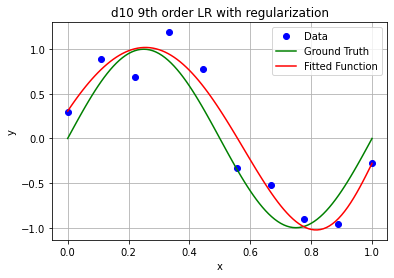

weights: [ 17.53893755 -22.00647045 -21.06911983   7.03985659  33.8281617
  20.79696185 -38.38285112  -5.43884906   8.07411308  -0.0974112 ]
w shape:  (10, 1)


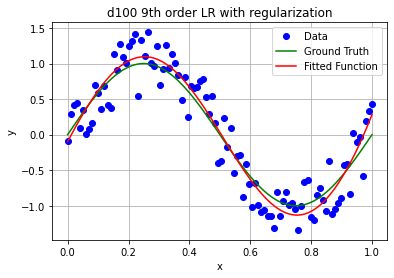

In [6]:
# YOUR CODE GOES HERE

# d10 w/ regularization 
model9 = ninth_order()
w10_9th_l2 = model9.train_weight(x10, y10, regularization=True, L = np.exp(-10))
yreg10_9th_l2 = model9.fit(xr)
plot_model(x10, y10, xt, yt, xr, yreg10_9th_l2, title = "d10 9th order LR with regularization")


# d100 w/ regularization
w100_9th_l2 = model9.train_weight(x100, y100, regularization=True, L = np.exp(-10))
yreg100_9th_l2 = model9.fit(xr)
plot_model(x100, y100, xt, yt, xr, yreg100_9th_l2, title = "d100 9th order LR with regularization")


## Discussion:

What differences between the regularized and standard 9th order models fit to `d10` do you notice? How does regularization affect the fitted function?

### *Your answer goes here*

From the weights of `d10` and `d10 with regularization`, we can see that regularization penalizes large weights which make the model less complex since higher order parameters are compressed. This attribute is reflected in the comparison between graph `d10 9th order LR` and `d10 9th order LR with regularization`. 


## LLS with $L_2$ regularization and gradient descent

For complex models, the size of $X'X$ can be large, making matrix inversion computationally demanding. Instead, one can use gradient descent to compute $w$. In our notes, we derived the gradient descent approach both for unregularized as well as $L_2$ regularized linear regression. The formula for the gradient descent approach with $L_2$ regularization is:  

$ \frac{\partial obj}{\partial w} = X'Xw - X'y + \lambda \mathbb{I}_m w$

$ w^{new} \leftarrow w^{cur} - \alpha \frac{\partial obj}{\partial w}$


In this problem, could gradient descent get stuck in a local minimum? Explain why / why not?

### *Your answer goes here*
Gradient decent can never be stuck in a local minimum since the loss functon we estimate will always be a quadratic function no matter how complex (dimensionality) is our problem. However, this does not guarantee that we can find the optimum solution everytime, it also depends on hyperparameter tuning (lr, batch size, numbers of iteration) and how we train the model (batch training, SGD). 


You will consider just a single case in the following question:

1. Data:  data10.txt, Model: 9th order polynomial.

Starting with a weight vector of zeros as the initial guess, and $\lambda = e^{-10}$, $\alpha = 0.075$, apply 50000 iterations of
gradient descent to find the optimal model parameters. In practice, when you train your own models you will have to determine these parameters yourself!

For the trained model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.


weights: [-3.85457875 -0.40351789  2.81217121  4.9128699   4.63900381  0.854452
 -5.76006075 -9.34031661  5.56763369  0.29561747]
Train with Gradient Descent: lr 0.075000, iterations 50000, regularization= True


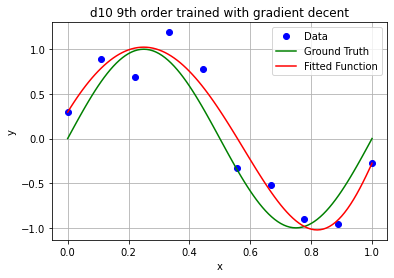

In [7]:
# YOUR CODE GOES HERE
w0 = np.zeros([10,1])
model_guess = ninth_order()

# train with gradient
model_guess.gradient_train(x10, y10, w0 = w0, regularization=True,L = np.exp(-10)) 
ygrad10_9th_l2 = model_guess.fit(xr)
plot_model(x10, y10, xt, yt, xr, ygrad10_9th_l2, title = "d10 9th order trained with gradient decent")


## Discussion:

Visually compare the result you just obtained to the same 9th order polynomial model with $L_2$ regularization where you solved for `w` directly in the previous section. They should be very similar. Comment on whether gradient descent has converged. 

### *Your answer goes here*

From visul comparison, the two graphs are about identical. As such, we can infer that gradient decent has converged. 